<a href="https://colab.research.google.com/github/Fatemah-Husain/Complete-Project-in-Data-Science/blob/main/Blog_A_Complete_Guide_for_Dataset_Extraction_and_Analysis_Tweepy_and_Perspective_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**A Complete Guide for Dataset Extraction and Analysis: Tweepy and Perspective API**

This blog post is written [by Dr. Fatemah Husain (f.husain@ku.edu.kw)](https://https://infoscilab.ku.edu.kw/) the full blog post is available at[ my Medium account ](https://https://medium.com/@f.husain) and the resources used can be downloaded [from my GitHub repository](https://github.com/Fatemah-Husain). 



*Disclaimer: This article explores the Perspective API for online toxic comments predictions. Some toxic comments shown in this article are samples selected for illustration purposes and do not represent the views of the author*

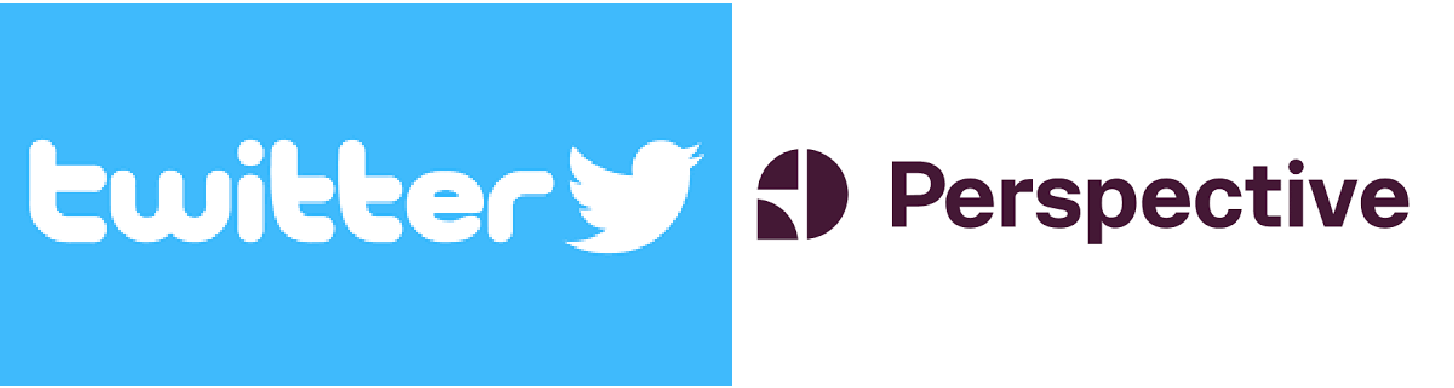

Twitter is an online microblogging and social networking platform where users can post short messages, up to 280 characters' length. These short messages are called Tweets. Having limited Tweet's length supports the use of direct and concise language, which makes it easy for users to scan and read Tweets. However, it also becomes very challenging to write a Tweet. In addition to text, Tweets can also include pictures, sounds, or videos.


Nowadays, politicians, celebrities, and almost all influential personalities are using Twitter as a channel to communicate with the public and post about their lives and thoughts. This diverse and rich online presence of famous people on Twitter makes it a great place to find about events in the community, strengthen general knowledge, and connecting with people from all around the world. Moreover, companies, universities, organizations, and governments are also using Twitter to post about their events, plans, or products.
Twitter content is widely used in studying people's opinions and attitudes toward several topics or products. This can help to better understand social problems and develop better solutions and improve regulations.


On the other hand, the increasing number of online platforms for user-generated content (e.g, Twitter) enable more people to experience freedom of expression than ever before. In addition, users of these platforms can be anonymous and hide their identity, which can increase the chance of misusing these platforms. Online abusive and toxic conversation creates an exclusive environment and in more severe cases, it can foster real-world violence. Freedom of expression or speech should not promote harmful content like hate speech, bullying, or abusive behavior, and it needs protections to certify a safe and engaging environment in which all participants can freely express themselves without fear.


Some countries have issued laws to ban hate speech, a kind of offensive language, on social networking platforms. For example, in 2017, Germany passed the Network Enforcement Act, a law that requires social media companies to remove hate speech from their websites. In addition to legislative reforms, technological solutions have been adopted to enforcing these reforms.
In this post, we will show how to extract datasets from Twitter API using a Python library called Tweepy based on keywords and terms. The output dataset file includes a set of metadata for each Tweet in an easy-to-use CSV format. We will extract two datasets in two languages: Arabic and English.


After extracting the datasets. We will also explore the Perspective API to identify toxic tweets written in the Arabic and English languages. The main content of this article is summarized in the following points:
1. Definition of toxicity in online comments.
2. Introduction to the Tweepy python library and its main features.
3. Introduction to the Perspective API and its main features.
4. Extracting datasets.
5. Exploratory data analysis.
6. Applying the Perspective API.
7. Evaluating samples from the results.

#Definition of Toxicity in Online Comments:

Risch and Krestel (2020) define a toxic comment as a rude, disrespectful, or unreasonable comment that is likely to make other users leave a discussion. The OpenWebdivides toxic comments based on two main categories: hate speech and online harassment or trolling.


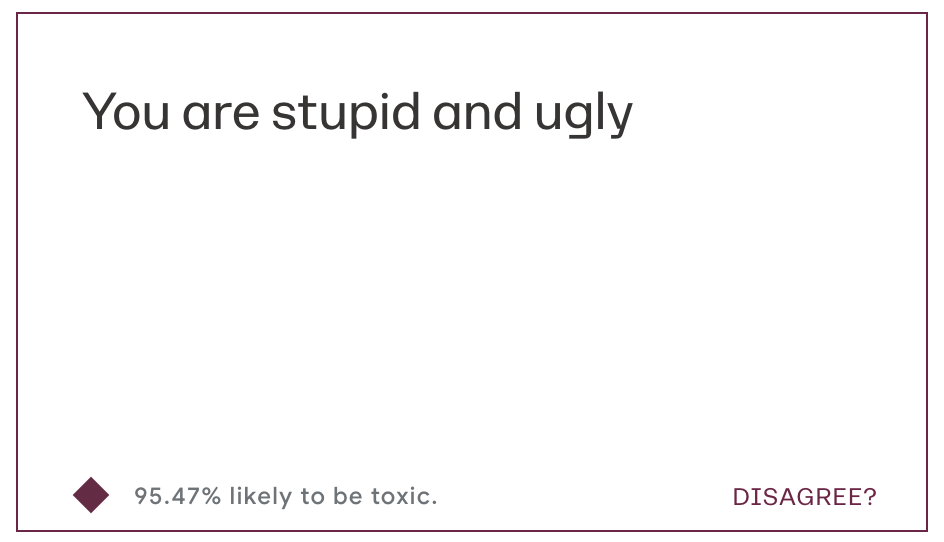



An example of a toxic comment

#Introduction to the Tweepy Python Library and Its Main Features:


Before starting with the code, you will need to follow the instructions provided by Twitter Developer Platform to get Twitter account access credentials. Twitter offers multiple account type depending on your purpose from downloading and using the data. Each account's type might have different features. After approving your request, you will receive consumer_key, consumer_secret, access_token, and access_token_secret, which are mandatory to access Twitter API. These credentials will be needed when you are using Tweepy. 
Tweepy is an open-sourced python library that serves as the gate to Twitter API. It helps developer to access most Twitter features (e.g., tweets, retweets, likes, etc.) without dealing with the details, such as HTTP requests, rate limit, authentication, serialization, etc.


Introduction to the Perspective API and Its Main Features:
Google and the research group Jigsaw develop the Perspective API to promote better online conversations. The Perspective API applies machine learning algorithms to identify toxic comments and provide scores for 6 main attributes:
1. Severe Toxicity
2. Insult
3. Profanity
4. Identity attack
5. Threat
6. Sexually explicit

The perspective API is hosted on Google Cloud Platform. It is publicly available for free and support multiple languages; such as Arabic, Chinese, Czech, Dutch, English, French, German, Hindi, Hinglish, Indonesian, Italian, Japanese, Korean, Polish, Portuguese, Russian, and Spanish.


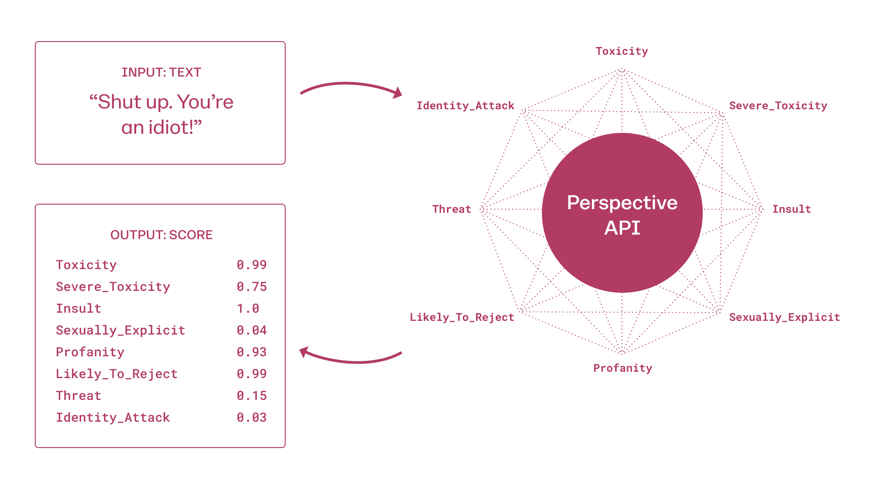



Source: https://developers.perspectiveapi.com/s/about-the-api 

To get started with your project, you need to follow the instruction on this Doc and request an API access.



#Extracting Datasets:

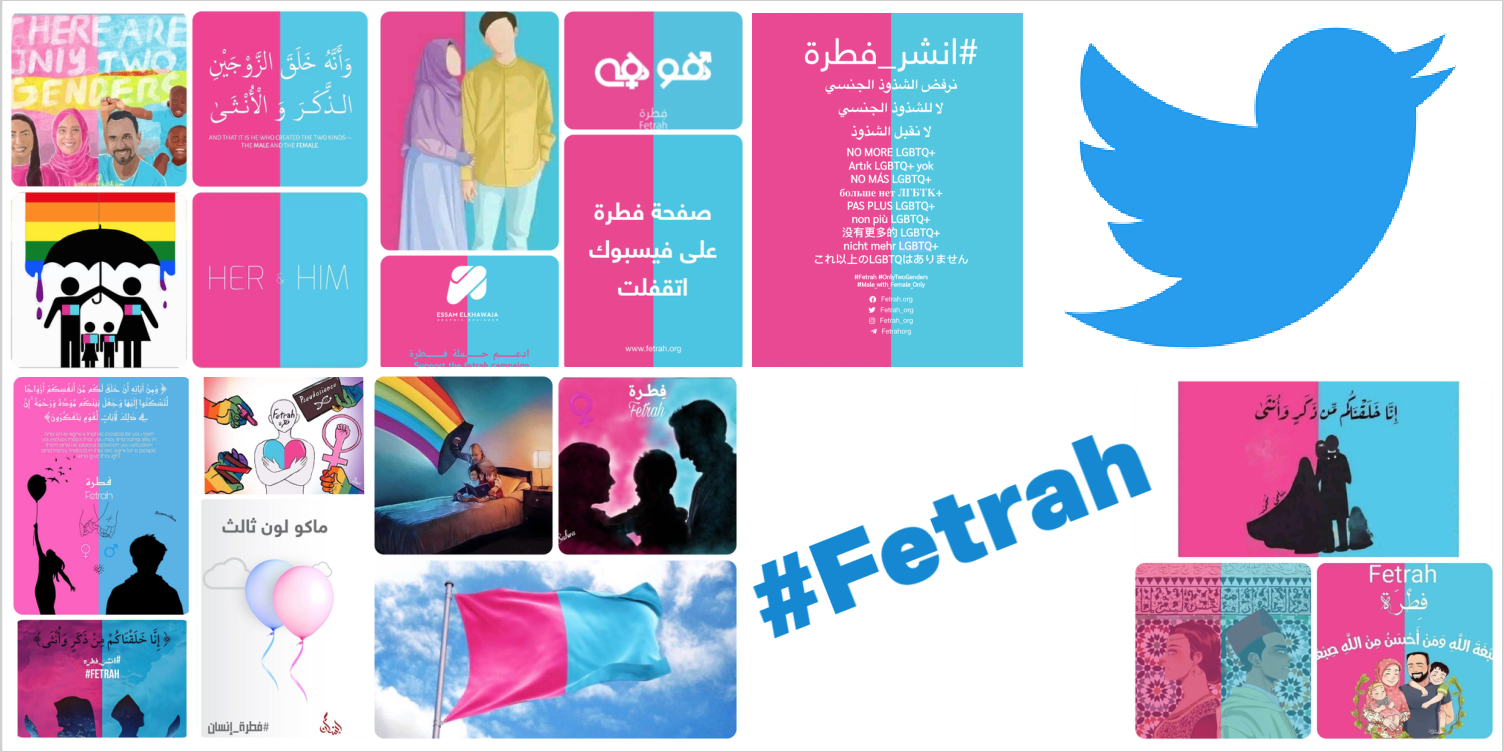






We select a recent online movement that has been viral in a limited time. The Fetrah / فطرة (Primitiveness) movement aims to limit the effect of the LGPTQ, encourage the binary gender classification, and protect the values of males and females.  They created accounts and pages for them on multiple social media platforms; including Instagram, Twitter, Facebook, and Telegram. The number of the followers in their social media accounts increased rapidly within a limited time, which demonstrates the effects of this movement. Facebook closed their Facebook page when their followers reached 2 millions. However, the movement remains spreading and its followers are on the rise on the other social media platforms.


To extract the dataset and prepare it to the next analysis step, the following four steps are required: 


**Step 1: Importing Libraries**


Three Python libraries are used in extracting and preparing the dataset; Tweepy to connect with Twitter API, Pandas to transform the data into an organized format in a dataframe, and CSV to create the output dataset CSV file.

In [1]:
# importing libraries
import tweepy
import pandas as pd
import csv


**Step 2: Accessing Twitter API**


In this step, we provide Twitter API credentials to connect to the API through Tweepy using the following script. The API supports access to several Twitter’s available functionalities (tweets, retweets, mentions, likes …etc).     



In [ ]:
# Setting Twitter API credentials
consumer_key= "" # Insert your consumer key
consumer_secret= "" # Insert your consumer secret
access_token="" # Insert your access token
access_token_secret="" # Insert your access token secret

# Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Creating an object from Twitter API
api = tweepy.API(auth)


**Step 3: Setting Parameters and Extracting Tweets**

Parameters can be used as filters to search for our targeted Tweets and to customize the search.  The followings are the parameters that will be used in this exercise:

1. q : for the keywords or terms used in search query. For multiple keywords search, they need to be defined in a single quotes and separated by ‘OR’. 

2. count  : number of tweets per page

3. lang : the language of tweets specified using, for example “ar” for Arabic, “en” for English. For more information about the languages supported by Twitter and their codes, please check this page. 

4. since : the start date of search formatted as YYYY-MM-DD

5. until : the stop date formatted as YYYY-MM-DD

6. result_type : the type of the search results, which could have one from the three values: “recent” for the most recent results, “popular” for the most popular results, and “mixed” for both popular and real time results.

7. include_entities : entities provide additional contextual information. It includes hashtags, user mentions, links, stock tickers (symbols), Twitter polls, and attached media. They will be included in the results as an array when set to True.

8. tweet_mode: this parameter added after the extension of the number of character per Tweet from 140 to 280 characters. When tweet_model is set to “extended”, it will extract the full untruncated Tweets and if it sets to “compat”, it will give untruncated Tweets with 140 characters.

9. Encoding : this parameter might be helpful if the extracted Tweets were in non English, for example, setting the encoding value to ‘utf-8-sig’ will work very good for Arabic Tweets. For more details about character encoding in Twitter, you can refer to this webpage. 


Twitter use pagination feature to iterate through timelines. This pagination feature also returns the requested data in a series of pages. Thus, a page or cursor parameter need to be provided with each data request to manage the pagination loop. I used the Cursor object in Tweepy to manage the pagination feature easily.

 
Two methods are used to support instances from the Cursor object:

1. items : this method takes the maximum number of items to iterate over per page returned
2. pages : help to process per page of results and takes the maximum number of pages to iterate over

For more information about the available parameters, please check this webpage.
 

In [ ]:
# Setting parameters
# We use two languages 'ar' for Arabic and 'en' for English, so we can have two datasets
# The same keywords are used for both datasets

limit = 10000
language = 'en' # others could be 'en', 'fa', 'tr'
keywords = '#fetrah OR #فطرة'
startDate = "2022-07-02"
endDate = "2022-07-11"

# Passing the parameters into the Cursor constructor method
public_tweets = tweepy.Cursor( api.search,
                                q= keywords,
                                result_type='recent',
                                since = startDate,
                                until = endDate,
                                count=100,
                                include_entities=True,
                                lang=language,
                                tweet_mode="extended",
                                encoding='utf-8-sig').items(limit)


**Step 4: Saving Results into a CSV File**

After pulling the dataset, an array is created for each attribute we want to save. Then, all arrays are arranged into a Pandas dataframe to create a Comma-Separated Values (CSV)  file that is easy to use for further processing and analyzing.

In [ ]:
# Defining Arrays to save results for each attribute seperatly
tweet_id_list = []
tweet_text_list = []
tweet_location_list = []
tweet_geo_list = []
user_screen_name_list = []
tweet_created_list = []
tweet_contributors_list = []
tweet_entities_list =[]
tweet_retweet_count_list = []
tweet_source_list = []
tweet_username_list = []
tweet_followers_count_list = []
friends_count_List = []
user_url_list = []
user_desc_list = []


# Iterating through the results to extract the results
for tweet in public_tweets:
    tweet_id_list.append(tweet.id)
    tweet_text_list.append(tweet.full_text)
    tweet_location_list.append(tweet.user.location)
    tweet_geo_list.append(tweet.geo)
    user_screen_name_list.append(tweet.user.screen_name)
    user_url_list.append(tweet.user.url)
    user_desc_list.append(tweet.user.description)
    tweet_source_list.append(tweet.source)
    tweet_created_list.append(tweet.created_at)
    tweet_contributors_list.append(tweet.id_str)
    tweet_entities_list.append (tweet.entities)
    tweet_retweet_count_list.append(tweet.retweet_count)
    tweet_username_list.append(tweet.user.name)
    tweet_followers_count_list.append(tweet.user.followers_count)
    friends_count_List.append(tweet.user.friends_count)

# Creating a Pandas dataframe to organize the data into a table
df = pd.DataFrame({
    'tweet_id': tweet_id_list,
    'tweet_text': tweet_text_list,
    'tweet_location': tweet_location_list,
    'tweet_geo':tweet_geo_list,
    'user_screen': user_screen_name_list,
    'url' : user_url_list,
    'user_desc': user_desc_list,
    'tweet_source': tweet_source_list,
    'tweet_created': tweet_created_list,
    'tweet_contributors': tweet_contributors_list,
    'tweet_entities': tweet_entities_list,
    'tweet_retweet_count': tweet_retweet_count_list,
    'tweet_username': tweet_username_list,
    'tweet_followers_count': tweet_followers_count_list,
    'friends_count':friends_count_List})

In [ ]:
df

,tweet_id,tweet_text,tweet_location,tweet_geo,user_screen,url,user_desc,tweet_source,tweet_created,tweet_contributors,tweet_entities,tweet_retweet_count,tweet_username,tweet_followers_count,friends_count
0,1546233025784061955,Adam and Eve not Adam and steve\n#فطرة,,None,ladyblu00998492,None,,Twitter for Android,2022-07-10 20:40:55,1546233025784061955,"{'hashtags': [{'text': 'فطرة', 'indices': [32,...",0,lady blue,5,7
1,1546230480705658880,RT @MihrabanHussein: There are only two gender...,"Dubai, United Arab Emirates",None,sameer_abudan,None,Love ur self,Twitter for iPhone,2022-07-10 20:30:48,1546230480705658880,"{'hashtags': [{'text': 'فطرة', 'indices': [74,...",127,Sameer abudan,8,177
2,1546230464343580677,RT @Omar_Elmansy133: #Fetrah #فطرة \nWe came f...,"Dubai, United Arab Emirates",None,sameer_abudan,None,Love ur self,Twitter for iPhone,2022-07-10 20:30:44,1546230464343580677,"{'hashtags': [{'text': 'Fetrah', 'indices': [2...",120,Sameer abudan,8,177
3,1546230452708687873,RT @esraayousef1973: #Fetrah save our future g...,"Dubai, United Arab Emirates",None,sameer_abudan,None,Love ur self,Twitter for iPhone,2022-07-10 20:30:42,1546230452708687873,"{'hashtags': [{'text': 'Fetrah', 'indices': [2...",92,Sameer abudan,8,177
4,1546230416813834241,RT @opls67: God created us as two genders ONLY...,"Dubai, United Arab Emirates",None,sameer_abudan,None,Love ur self,Twitter for iPhone,2022-07-10 20:30:33,1546230416813834241,"{'hashtags': [{'text': 'فطرة', 'indices': [48,...",795,Sameer abudan,8,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,1543203456009359360,RT @MoMarrwan: Only two \n#fetrah \n#فِطرة \n#...,,None,moyassi83515472,None,team of biomedical engineering students,Twitter Web App,2022-07-02 12:02:29,1543203456009359360,"{'hashtags': [{'text': 'fetrah', 'indices': [2...",25,mo yassin,0,1
6744,1543203405107265536,RT @MoMarrwan: Only two \n#fetrah \n#فِطرة \n#...,"الشرقية, مصر",None,FAHD_Eegypt,None,لما بتقعد تفكر في أحداث ومواقف حصلتلك وتفكر كت...,Twitter for Android,2022-07-02 12:02:17,1543203405107265536,"{'hashtags': [{'text': 'fetrah', 'indices': [2...",25,FᎯᎻᎠ,2,4
6745,1543203092295983107,Only two \n#fetrah \n#فِطرة \n#ضد_تميًع_الفطرة...,,None,MoMarrwan,None,I am the One,Twitter Web App,2022-07-02 12:01:03,1543203092295983107,"{'hashtags': [{'text': 'fetrah', 'indices': [1...",25,مرْوان,83,34
6746,1543186467635216386,RT @AhmedIb78832400: #fetrah\n#فطرة\nKeep goin...,Kuwait 🇸🇾,None,sanoa1_,https://t.co/4sSqAyFdJD,ᜊ,Twitter for iPhone,2022-07-02 10:54:59,1543186467635216386,"{'hashtags': [{'text': 'fetrah', 'indices': [2...",617,SOG ☠︎︎,368,105




Converting the dataframe to a CSV file to download it. If you are using Google Colab, we also include the code needed to push the file to Google drive and save it.  You will need to provide your Google account credentials to permit saving the file to your Google Drive.


In [ ]:
# Converting the dataframe to CSV file
df.to_csv('Fetrah_EN.csv', sep=',', index=False, encoding='utf-8-sig')

# Saving the file to Google drive

file_name = "Fetrah_EN.csv"

from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build
from google.colab import auth

auth.authenticate_user()
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
  file_metadata = {'name': name, 'mimeType': 'application/octet-stream'}
  media = MediaFileUpload(path, mimetype='application/octet-stream', resumable=True)
  created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

  return created

save_file_to_drive(file_name, file_name)

{'id': '1S7rh3I12eC0F5hS6eCHBPyeEeugc_dc1'}

To this point, the two datasets of both the Arabic and English tweets covering the hashtags "#Fetrah" or "#فطرة" are extracted from Twitter. All datasets are also available on this GitHub repository.


#Exploratory Data Analysis:


Before working with the data, it is always better to get to know it and understand its content. An initial investigation of the dataset is very crucial to conduct before using the dataset in research or further analysis. It can help to detect trends and patterns in data, identify outliers, and find valuable relations among variables. This investigation is called Exploratory Data Analysis (EDA). The EDA applies statistical methods and data visualization tools to support the exploration process. The main goals of the EDA are to deeply understand the content and structure of the data, and to find out if there are any problems in the data.


The type of the data explored is mostly textual data taken from the main content of each tweet. We will present an overview for some EDA tools for the Arabic and English language using Python; such as the number of characters per token and the number of tokens per post, and word cloud graph. Conducting an in-depth investigation support understanding the content of the dataset from multiple dimensions. Some visualization tools are used to better understand the content and context of the data. This article covers the following steps:

**Step 1: Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
import nltk
import csv
import string
import re
from nltk import word_tokenize
import itertools
import collections
import codecs
import requests
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Step 2: Reading the Dataset:**



First, we make sure that the two datasets are avaiable on the Colab project repository that we are currently working on. If they were not available, we can download them from the Github repository mentioned above and upload them  to the current Colab project, or repeat the data extraction step. Then we fetch the file as the following:


In [ ]:
# Reading the datasets
Dataset_AR = pd.read_csv('/content/Fetrah_AR.csv', sep=',', encoding='utf-8-sig')
Dataset_EN = pd.read_csv('/content/Fetrah_EN.csv', sep=',', encoding='utf-8-sig')
Dataset_AR

,Text,User_ScreenName,User_Profile,Users_URL,Follower_Count,Frinds_Count,ScreenName,Geo,Source,Location,Created_at,Contributors,Entities,Retweet_Count,Polarity,Subjectivity
0,RT @RassdNewsN: موقع فيسبوك يغلق الصفحة الرسمي...,ElkafaasM,‏‏‏ان مات الأب فدا وطن ما احلي عيش الأيتام,NaN,57,300.0,م. محمد القفاص,NaN,Twitter for Android,مصر,2022-07-09 23:59:31,1.545921e+18,"{'hashtags': [{'text': 'فطرة', 'indices': [56,...",1529.0,0.0,0.0
1,RT @fetrah_org: بعد انتشار الفكرة ووصول صفحة ف...,ooosama16,NaN,NaN,20,29.0,ooosama,NaN,Twitter for Android,NaN,2022-07-09 23:59:28,1.545921e+18,"{'hashtags': [], 'symbols': [], 'user_mentions...",2686.0,0.0,0.0
2,"RT @7usaini7: ""فيسبوك"" يغلق الصفحة الرسمية لمب...",azoooz20300,NaN,NaN,2044,664.0,عبدالعزيز عزوز Abdul Aziz Azzouz,NaN,Twitter for iPhone,NaN,2022-07-09 23:59:02,1.545920e+18,"{'hashtags': [{'text': 'فطرة', 'indices': [52,...",1280.0,0.0,0.0
3,RT @fetrah_org: بعد انتشار الفكرة ووصول صفحة ف...,SamehHa27086090,{ وَكَانَ ٱلشَّیۡطَـٰنُ لِلۡإِنسَـٰنِ خَذُولࣰا },NaN,38,1014.0,سامح حسن,NaN,Twitter for Android,NaN,2022-07-09 23:58:48,1.545920e+18,"{'hashtags': [], 'symbols': [], 'user_mentions...",2686.0,0.0,0.0
4,RT @fetrah_org: بعد انتشار الفكرة ووصول صفحة ف...,AbuAMMEER,مجنونٌ بعشقكِ أنتِ,NaN,151,219.0,Hussain Ali Al Rubeh,NaN,Twitter for iPhone,NaN,2022-07-09 23:58:36,1.545920e+18,"{'hashtags': [], 'symbols': [], 'user_mentions...",2686.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,RT @fetrah_org: بعد انتشار الفكرة ووصول صفحة ف...,TOXICABDOL,engineering student preparing at Cambridge Uni...,https://t.co/LrtIzxgl4w,735,569.0,ABDELRHMAN𓂀,NaN,Twitter for iPhone,"Kuwait,Egypt",2022-07-09 00:01:19,1.545559e+18,"{'hashtags': [], 'symbols': [], 'user_mentions...",2688.0,0.0,0.0
9998,RT @fetrah_org: بعد انتشار الفكرة ووصول صفحة ف...,fahad_frayyes,". ""كم تمنيت مرور الأيام ونسيت أنها عمري""",NaN,229,626.0,fahad alrayyes,NaN,Twitter for iPhone,دومة الجندل,2022-07-09 00:01:00,1.545559e+18,"{'hashtags': [], 'symbols': [], 'user_mentions...",2688.0,0.0,0.0
9999,RT @fetrah_org: بعد انتشار الفكرة ووصول صفحة ف...,MahmoudElshimi9,Medical student,NaN,3393,4048.0,Mahmoud Elshimi,NaN,Twitter for iPhone,NaN,2022-07-09 00:00:27,1.545558e+18,"{'hashtags': [], 'symbols': [], 'user_mentions...",2688.0,0.0,0.0
10000,RT @fetrah_org: #فطرة تتعرض حاليًا لأكبر حملة ...,Shehabm68394782,‏‏يحيا الوطن،من الوطن؟نحن الوطن ومن دوننا الوط...,NaN,6,208.0,Shehab mohamed,NaN,Twitter for Android,"أسوان, مصر",2022-07-09 00:00:23,1.545558e+18,"{'hashtags': [{'text': 'فطرة', 'indices': [16,...",2219.0,0.0,0.0


Since the exploration focuses only on the tweets, we will extract the tweets and save them into an array to be used on the following steps.

In [ ]:
# Extracting tweets only
tweets_AR = Dataset_AR.loc[:,"Text"]
tweets_EN = Dataset_EN.loc[:,"tweet_text"]
tweets_EN

0                  Adam and Eve not Adam and steve\n#فطرة
1       RT @MihrabanHussein: There are only two gender...
2       RT @Omar_Elmansy133: #Fetrah #فطرة \nWe came f...
3       RT @esraayousef1973: #Fetrah save our future g...
4       RT @opls67: God created us as two genders ONLY...
                              ...                        
6743    RT @MoMarrwan: Only two \n#fetrah \n#فِطرة \n#...
6744    RT @MoMarrwan: Only two \n#fetrah \n#فِطرة \n#...
6745    Only two \n#fetrah \n#فِطرة \n#ضد_تميًع_الفطرة...
6746    RT @AhmedIb78832400: #fetrah\n#فطرة\nKeep goin...
6747    RT @omarsayed_ima: #فطرة #Fetrah #انشر_فطرة th...
Name: tweet_text, Length: 6748, dtype: object

**Step 3: Basic Filtering and Cleaning:**

Removing duplicated tweets before analyzing and exploring can save the processing times and resources.  In this step, we remove mentioned usernames, the retweet keyword (RT), and the newline character (\ln) then we remove the duplicates as the following:  


In [ ]:
# this method clean tweets to remove usernames, RT, and newline
def removingDuplication(tweet):
  tweet = str(tweet)
  # remove usermentions
  tweet = re.sub('@[a-zA-Z0-9_.-:]*', '', tweet)
  # remove retweet
  tweet = re.sub('RT', '', tweet)
  # Remove new line character
  tweet = re.sub('\n', ' ', tweet)
  return tweet

# defining arrays for the filtered tweets
filteredTweets_en = []
filteredTweets_ar = []

# sending the English and Arabic tweets to filter unwanted characters and prepare them for removing duplicate
for tweet in Dataset_EN.loc[:,"tweet_text"]:
  twt = removingDuplication(tweet)
  filteredTweets_en.append(twt)

for tweet in Dataset_AR.loc[:,"Text"]:
  twt = removingDuplication(tweet)
  filteredTweets_ar.append(twt)

# Convert the cleaned tweets format to a Pandas dataframe
df_en = pd.DataFrame({'tweet':filteredTweets_en})
df_ar = pd.DataFrame({'tweet':filteredTweets_ar})

# Checking the size of the dataframe before removing duplicated tweets
print("Number of English tweets before removing duplicates:", df_en.shape)
print("Number of Arabic tweets before removing duplicates:", df_ar.shape)

# Removing duplicates
df_en = df_en.drop_duplicates()
df_ar = df_ar.drop_duplicates()

# Checking the size of the dataframe after removing duplicated tweets
print("Number of English tweets after removing duplicates:", df_en.shape)
print("Number of Arabic tweets after removing duplicates:", df_ar.shape)

Number of English tweets before removing duplicates: (6748, 1)
Number of Arabic tweets before removing duplicates: (10002, 1)
Number of English tweets after removing duplicates: (1168, 1)
Number of Arabic tweets after removing duplicates: (902, 1)


Number of English tweets before removing duplicates was 6748 tweets and after cleaning and filtering is 1168 tweets. While the number of Arabic tweets before removing duplicates was 10002 tweets and after removing duplicates is 902 tweets. Thus, around 83% of the English tweets were duplicates and around 91% were duplicated Arabic tweets.

Now, we can start with some simple statistical analysis includes finding frequencies of words, frequencies of stop words, statistical measurements for the lengths of the text based on the number of tokens, and statistical measurements for the lengths of the tokens based on the number of characters to analyze their relationships to the dataset content. To extract the most frequently used words accurately, we removed a list of stop words from the text. Stop words could help in defining the context of the posts. We conduct simple frequency analysis to generate the top stop words, as stop words that appear only in a particular context or dataset might be better to consider in analysis as a regular word rather than as a stop word. We investigate the complexity of the text used in the dataset to check if there is any pattern or relationship between the complexity of the text used and the context of the dataset, we used two measures to peruse the goal of this analysis; the number of characters per token and the number of tokens per post. These analysis might be more informative if we are comparing among multiple datasets or among texts from different categories/ labels


In [ ]:
df_en

,tweet
0,Adam and Eve not Adam and steve #فطرة
1,There are only two genders. This is our real...
2,#Fetrah #فطرة We came from Adam and Eve not...
3,#Fetrah save our future generation #فطرة htt...
4,God created us as two genders ONLY. #فطرة #...
...,...
6723,There are only two genders ! #انشر_فِطرة #فطرة...
6728,#fetrah is an initiative through which you sho...
6731,There are only two genders #fetrah #فطرة #fetra
6734,There are only two genders #fetrah #فطرة https...


In [ ]:
# get top 10 most frequent English tweets
n = 10
df_en['tweet'].value_counts()[:n].index.tolist()

['Adam and Eve not Adam and steve #فطرة',
 "#فطرة #فطرة_إنسان #الكويت #كويت #Kuwait #q8 #LGBT #جمعية_انسان #جمعية_إنسان_الخيرية I don't support LGBT community https://t.co/EIucuczJtk",
 'God created us as two genders ONLY. #فطرة https://t.co/ByyBCM6ZL2',
 ' A new flag to fight gay ideas.   Science from the Innate Initiative, which carries only two colors, symbolizes the only two types of male and female.  #فطرة #fetrah  https://t.co/WKK5pH2DnZ',
 'There are only two genders  #fetrah  #فطرة  #انشر_فطرة https://t.co/uTrac8abpj',
 'Because there is 0nly two genders and one se×ua|ity which is hetero i support   #Fetrah ♂️♀️   #ادعم_مبادره_فطره #فطرة #فطرة_إنسان #فطرة_لرفض_الشـzوz #انشر_فطرة',
 "Natural: marrying a 7yo when you're 50yo and having sexual intercourse with when she's 9yo.  Abnormal: 2 mature individuals from the same gender consenting to sexual intercourse. #فطرة 🤦🏻\u200d♀️",
 'Support #Fetrah https://t.co/sZB1b5WgUX',
 'There are only 2 genders, male and female, nothing less 

In [ ]:
# get top 10 most frequent Arabic tweets
n = 10
df_ar['tweet'].value_counts()[:n].index.tolist()

['  موقع فيسبوك يغلق الصفحة الرسمية لمبادرة #فطرة، بعد وصولها إلى أكثر من 2 مليون متابع https://t.co/IjNwwn36xp',
 '  إذا كانت فطرتكم تحرض على قتل إنسان بريء بسبب ميوله الجنسية فلا أهلاً ولا سهلاً بها.  #فطرة https://t.co/abxnUPrDcC',
 ' يسكروها صفحاتنا كلها بتصير #فطرة   😃 كل ما تكتب بوست عالفيس أو تعليق أكتب جنبه #فطرة   الفكرة ما بتموت',
 '     قفلتوا الصفحة بس ملغيتوش الفكرة، مفكر كده انكوا انتصرتوا؟ ربنا يعينكم على دماغكم دي 😂😂  #فطرة  #Fetrah الهاشتاج لسه موجود 😎',
 'موقع فيسبوك يغلق الصفحة الرسمية لمبادرة #فطرة،التي تدعو لرفض الش\\\\ذ\\وذ, بعد وصولها إلى أكثر من 2 مليون متابع https://t.co/vcM5Qf1GDm',
 'مولانا العربيد فيسبوك حامي الملة المثقوبية يقفل جميع صفحات الفطرة…رعب إنتشار الشرف والنهي عن المنكر #فطرة #فطرة_إنسان #fitrah https://t.co/7YFAee11cd',
 'الحمدلله علي نعمة ترك فيسبوك وكُره زوكربيرج، داخل في ٣ سنين ولا حاجة.👋 #فطرة  #إدعم_فطرة https://t.co/lUPfYEA9YZ',
 'حان الوقت لكى نلقن فيس بوك درسا قاسيا  الا يوجد مليون فطرى يقومون على قلب رجل واحد  الا نستطيع ان نقاطع فيس بوك

Now, we can start with some simple statistical analysis includes finding frequencies of words, frequencies of stop words, statistical measurements for the lengths of the text based on the number of tokens, and statistical measurements for the lengths of the tokens based on the number of characters to analyze their relationships to the dataset content. To extract the most frequently used words accurately, we removed a list of stop words from the text. Stop words could help in defining the context of the posts. We conduct simple frequency analysis to generate the top stop words, as stop words that appear only in a particular context or dataset might be better to consider in analysis as a regular word rather than as a stop word. We investigate the complexity of the text used in the dataset to check if there is any pattern or relationship between the complexity of the text used and the context of the dataset, we used two measures to peruse the goal of this analysis; the number of characters per token and the number of tokens per post. These analysis might be more informative if we are comparing among multiple datasets or among texts from different categories/ labels.

**Step 4: Tokens Frequencies:**



Firstly, the text needs to be tokenized to breakdown all tweets into a single list of tokens. 

In [ ]:
# text tokenizer function
def my_tokenizer(text):
    text = str(text)
    return text.split() if text != None else []

# transform list of documents into a single list of tokens
tokens_ar = df_ar.tweet.map(my_tokenizer).sum()
print(tokens_ar)

['موقع', 'فيسبوك', 'يغلق', 'الصفحة', 'الرسمية', 'لمبادرة', '#فطرة،', 'بعد', 'وصولها', 'إلى', 'أكثر', 'من', '2', 'مليون', 'متابع', 'https://t.co/IjNwwn36xp', 'بعد', 'انتشار', 'الفكرة', 'ووصول', 'صفحة', 'فطرة', 'على', 'فيسبوك', 'لأكثر', 'من', '٢', 'مليون', 'شخص', 'على', 'مستوى', 'العالم.', 'وكعادة', 'الغرب', 'في', 'تقييد', 'الحريات', 'إذا', 'كان', 'ا…', '"فيسبوك"', 'يغلق', 'الصفحة', 'الرسمية', 'لمبادرة', '"#فطرة"', 'التي', 'وجدت', 'لمحاربة', 'الشذو_ذ،', 'وذلك', 'بعد', 'وصول', 'الصفحة', '2', 'مليون', 'متابع!!', 'فيسبوك', 'للأسف', 'أص…', 'إذا', 'كانوا', 'هم', 'لهم', 'حرية', 'ممارسة', 'الفعل..', 'فنحن', 'لدينا', 'مطلق', 'الحرية', 'في', 'رفض', 'الفعل', 'وعدم', 'الإعتراف', 'به..', '#الشذوذ_انحراف_مرفوض', '#انشر_ف…', 'منذ', 'القدم،', 'من', 'أيام', 'سدّوم،', 'من', 'أيام', 'اﻹسكندر', 'المقدوني،', 'هناك', 'من', 'يرتكب', 'اللواط', '!', 'و', 'لم', 'تتغيّر', '"الفطرة"', '!', 'الفطرة', '"باقية', 'و', 'تتمدد"', '!', 'و', '"باقية', 'وتتمدد"', '!', 'كل', 'هذه', 'الحملة', '(#فطرة_فكرة)', 'من', 'أجل', '"ق

In [ ]:
tokens_en = df_en.tweet.map(my_tokenizer).sum()
print(tokens_en)

['Adam', 'and', 'Eve', 'not', 'Adam', 'and', 'steve', '#فطرة', 'There', 'are', 'only', 'two', 'genders.', 'This', 'is', 'our', 'reality\U0001f90d!.', '#فطرة.', '#Fetrah.', 'https://t.co/bCzQQKoRa8', '#Fetrah', '#فطرة', 'We', 'came', 'from', 'Adam', 'and', 'Eve', 'not', 'Adam', 'and', 'Steve', 'https://t.co/a4iHyc9u93', '#Fetrah', 'save', 'our', 'future', 'generation', '#فطرة', 'https://t.co/tnZ1lWwiWc', 'God', 'created', 'us', 'as', 'two', 'genders', 'ONLY.', '#فطرة', '#Fetrah', 'https://t.co/1twKCw5p7A', 'Preserve', 'the', 'equation', 'of', 'life', 'and', 'human', 'balance👱♥️🧕', '#فطرة', 'https://t.co/f3R7kxGHul', 'i', 'support', 'fetrah..', '#fetrah', '#فیتڕەت', '#فطرة', 'https://t.co/cRjjYIHgIe', 'Your', 'flag', 'will', 'be', 'broken', 'soon....😏', '#Fetrah', '#فطرة', 'https://t.co/cWfqXiGnvJ', "It's", 'simply', 'binary,', 'always', 'has', 'been', 'and', 'forever', 'will', 'be.', 'Enough', 'with', 'this', 'nonsense.', '💜💙', '#Fetrah', '#فطرة', 'https://t.co/3wWcwCkZ…', 'You', "can't

Now, lets check out the top 20 commonly occurred words. 

A very quick check to the results shows that punctuations affect the results. It would be better to remove punctuations to have better results. Among the top frequently used words are stop words, such as "and" , "في/in". Stop words are the very common words in any language that are of little value to the analysis. It is recommended to filter the text from stop words before developing any Natural Language processing System (NLP). After removing all unnecessary content, we will check the top 20 tokens again.

Two lists of stop words were used to create an exclusive list. The Arabic stop words list available at Nuha Albadi's github repository and Mohamed Taher Alrefaie's github repository are used to further filter out and clean the Arabic tokens from unnecessary words.

In [ ]:
# This function cleans the Arabic tokens from all stop words
def removingStopwords(intweet):
    cleanTweet = ''
    temptweet = word_tokenize(intweet)
    stopword = []

    for i in temptweet:
        # Stop words can be downloaded from https://github.com/nuhaalbadi/Arabic_hatespeech for list 1 and
        # for list 2 from  https://github.com/mohataher/arabic-stop-words
        path_1 = "/content/stop_words.csv" # List 1
        path_2 = "/content/stop-words-list.txt" # List 2
        with codecs.open(path_1, "r", encoding="utf-8", errors="ignore") as myfile:
            stop_words = myfile.readlines()
        stop_words_1 = [word.strip() for word in stop_words]
        with codecs.open(path_2, "r", encoding="utf-8", errors="ignore") as myfile:
            stop_words = myfile.readlines()
        stop_words_2 = [word.strip() for word in stop_words]
        stop_words = stop_words_1 + stop_words_2
        if i not in stop_words:
            cleanTweet = cleanTweet + ' ' + i
    return cleanTweet

tokenFiltered_ar = []
for i in tokens_ar: 
  token = removingStopwords(i)
  tokenFiltered_ar.append(token)

In [ ]:
tokenFiltered_ar

[' موقع',
 ' فيسبوك',
 ' يغلق',
 ' الصفحة',
 ' الرسمية',
 ' لمبادرة',
 ' # فطرة،',
 '',
 ' وصولها',
 '',
 ' أكثر',
 '',
 ' 2',
 '',
 ' متابع',
 ' https : //t.co/IjNwwn36xp',
 '',
 ' انتشار',
 ' الفكرة',
 ' ووصول',
 ' صفحة',
 ' فطرة',
 '',
 ' فيسبوك',
 ' لأكثر',
 '',
 ' ٢',
 '',
 ' شخص',
 '',
 ' مستوى',
 ' العالم .',
 ' وكعادة',
 ' الغرب',
 '',
 ' تقييد',
 ' الحريات',
 '',
 '',
 ' ا…',
 " `` فيسبوك ''",
 ' يغلق',
 ' الصفحة',
 ' الرسمية',
 ' لمبادرة',
 " `` # فطرة ''",
 '',
 ' وجدت',
 ' لمحاربة',
 ' الشذو_ذ،',
 ' وذلك',
 '',
 ' وصول',
 ' الصفحة',
 ' 2',
 '',
 ' متابع ! !',
 ' فيسبوك',
 ' للأسف',
 ' أص…',
 '',
 ' كانوا',
 '',
 '',
 ' حرية',
 ' ممارسة',
 ' الفعل ..',
 ' فنحن',
 ' لدينا',
 ' مطلق',
 ' الحرية',
 '',
 ' رفض',
 ' الفعل',
 ' وعدم',
 ' الإعتراف',
 ' ..',
 ' # الشذوذ_انحراف_مرفوض',
 ' # انشر_ف…',
 '',
 ' القدم،',
 '',
 ' أيام',
 ' سدّوم،',
 '',
 ' أيام',
 ' اﻹسكندر',
 ' المقدوني،',
 '',
 '',
 ' يرتكب',
 ' اللواط',
 ' !',
 '',
 '',
 ' تتغيّر',
 " `` الفطرة ''",
 ' !',
 ' الفطرة',


In [ ]:
# This function cleans the English tokens from all stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
tokenFiltered_en = [w for w in tokens_en if not w.lower() in stop_words]

tokenFiltered_en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['Adam',
 'Eve',
 'Adam',
 'steve',
 '#فطرة',
 'two',
 'genders.',
 'reality\U0001f90d!.',
 '#فطرة.',
 '#Fetrah.',
 'https://t.co/bCzQQKoRa8',
 '#Fetrah',
 '#فطرة',
 'came',
 'Adam',
 'Eve',
 'Adam',
 'Steve',
 'https://t.co/a4iHyc9u93',
 '#Fetrah',
 'save',
 'future',
 'generation',
 '#فطرة',
 'https://t.co/tnZ1lWwiWc',
 'God',
 'created',
 'us',
 'two',
 'genders',
 'ONLY.',
 '#فطرة',
 '#Fetrah',
 'https://t.co/1twKCw5p7A',
 'Preserve',
 'equation',
 'life',
 'human',
 'balance👱♥️🧕',
 '#فطرة',
 'https://t.co/f3R7kxGHul',
 'support',
 'fetrah..',
 '#fetrah',
 '#فیتڕەت',
 '#فطرة',
 'https://t.co/cRjjYIHgIe',
 'flag',
 'broken',
 'soon....😏',
 '#Fetrah',
 '#فطرة',
 'https://t.co/cWfqXiGnvJ',
 'simply',
 'binary,',
 'always',
 'forever',
 'be.',
 'Enough',
 'nonsense.',
 '💜💙',
 '#Fetrah',
 '#فطرة',
 'https://t.co/3wWcwCkZ…',
 "can't",
 'family',
 'protect',
 '😂👍',
 '#Fetrah',
 'https://t.co/XZbQBVAPIm',
 "We'll",
 'never',
 'accept',
 'opposite',
 'fetrah',
 'Support',
 'Fetrah',
 '✊',
 

To remove punctuations, a customized set of Arabic punctuation is defined as well as available English punctuation lists at the NLTK library are used to filter tweets from all punctuation marks. We also remove double spaces and special characters, digits, URLs and diacritics from the Arabic tokens.

In [ ]:
# This function removes spaces, special characters, punctuations, and digits from the tokens
def removingCharacters(text):
    cleanTweet = ''
    temptweet = word_tokenize(text)
    for i in temptweet:
        # remove URL
        i = re.sub(r'^https?:\/\/.*[\r\n]*', '', i, flags=re.MULTILINE)
        # remove tags, mentions, and hashtags
        i = re.sub('(?:<[^>]+>)', '',i)
        i = re.sub(r"[,@\"'?\.$%_-]", " ", i, flags=re.I)
        arabicPunctuations = [".","`","؛","<",">","(",")","*","&","^","%","]","[",",","ـ","،","/",":","؟",".","'","{","}","~","|","!","”","…","“","–"] # defining customized punctuation marks
        englishPunctuations = string.punctuation # importing English punctuation marks
        englishPunctuations = [word.strip() for word in englishPunctuations] # converting the English punctuation from a string to array for processing
        punctuationsList = arabicPunctuations + englishPunctuations # creating a list of all punctuation marks
        stringPunctuations = ' '.join([str(item) for item in punctuationsList])
        i = i.replace(stringPunctuations, '')
        p1 = re.compile('\W')
        i = re.sub(p1, ' ', i)
        # remove digits
        i = re.sub(r'\d+','', i)
        #remove more than one space
        i = re.sub(r"\s+"," ", i)
        cleanTweet = cleanTweet + '' + i
    return cleanTweet


# remove diacritics from Arabic tokens
def diacritics(text):
    text = text.replace(u"\u064B", "")  # fatHatayn
    text = text.replace(u"\u064C", "")  # Dammatayn
    text = text.replace(u"\u064D", "")  # kasratayn
    text = text.replace(u"\u064E", "")  # fatHa
    text = text.replace(u"\u064F", "")  # Damma
    text = text.replace(u"\u0650", "")  # kasra
    text = text.replace(u"\u0651", "")  # shaddah
    text = text.replace(u"\u0652", "")  # sukuun
    text = text.replace(u"\u0670", "`")  # dagger 'alif
    return text

# Remove non English characters from the English tokens
def nospecial(text):
	import re
	text = re.sub("[^a-zA-Z0-9]+", "",text)
	return text


tokenFilteredCleaned_en = []
tokenFilteredCleaned_ar = []
for i in tokenFiltered_ar:
  token = diacritics(i)
  token = removingCharacters(i)
  tokenFilteredCleaned_ar.append(token)

for i in tokenFiltered_en:
  token = removingCharacters(i)
  token = nospecial(token)
  tokenFilteredCleaned_en.append(token)



# Removing empty tokens from the English list
while("" in tokenFilteredCleaned_en) :
    tokenFilteredCleaned_en.remove("")


In [ ]:
tokenFilteredCleaned_ar

['موقع',
 'فيسبوك',
 'يغلق',
 'الصفحة',
 'الرسمية',
 'لمبادرة',
 ' فطرة ',
 '',
 'وصولها',
 '',
 'أكثر',
 '',
 '',
 '',
 'متابع',
 'https  t co IjNwwnxp',
 '',
 'انتشار',
 'الفكرة',
 'ووصول',
 'صفحة',
 'فطرة',
 '',
 'فيسبوك',
 'لأكثر',
 '',
 '',
 '',
 'شخص',
 '',
 'مستوى',
 'العالم ',
 'وكعادة',
 'الغرب',
 '',
 'تقييد',
 'الحريات',
 '',
 '',
 'ا ',
 ' فيسبوك ',
 'يغلق',
 'الصفحة',
 'الرسمية',
 'لمبادرة',
 '  فطرة ',
 '',
 'وجدت',
 'لمحاربة',
 'الشذو ذ ',
 'وذلك',
 '',
 'وصول',
 'الصفحة',
 '',
 '',
 'متابع  ',
 'فيسبوك',
 'للأسف',
 'أص ',
 '',
 'كانوا',
 '',
 '',
 'حرية',
 'ممارسة',
 'الفعل ',
 'فنحن',
 'لدينا',
 'مطلق',
 'الحرية',
 '',
 'رفض',
 'الفعل',
 'وعدم',
 'الإعتراف',
 ' ',
 ' الشذوذ انحراف مرفوض',
 ' انشر ف ',
 '',
 'القدم ',
 '',
 'أيام',
 'سد وم ',
 '',
 'أيام',
 'اﻹسكندر',
 'المقدوني ',
 '',
 '',
 'يرتكب',
 'اللواط',
 ' ',
 '',
 '',
 'تتغي ر',
 ' الفطرة ',
 ' ',
 'الفطرة',
 ' باقية',
 '',
 'تتمدد ',
 ' ',
 '',
 ' باقية',
 'وتتمدد ',
 ' ',
 '',
 '',
 'الحملة',
 '  فطرة فكرة '

In [ ]:
#checking the top tokens again after filtering and cleaning
from collections import Counter

counter_ar = Counter(tokenFilteredCleaned_ar)
counter_ar.most_common(20)

[('', 3460),
 (' فطرة', 731),
 (' ', 509),
 ('الله', 148),
 (' Fetrah', 145),
 (' انشر فطرة', 87),
 ('فيسبوك', 86),
 ('الصفحة', 84),
 ('فطرة', 83),
 ('الفطرة', 74),
 ('حملة', 73),
 ('م ن', 70),
 ('الفكرة', 59),
 ('الن اس ', 59),
 ('يغلق', 53),
 ('كلنا', 53),
 ('إ ن ا', 52),
 ('الرسمية', 51),
 ('ذ ك ر ', 51),
 ('لمبادرة', 50)]

In [ ]:
#checking the top tokens again after filtering and cleaning
counter_en = Counter(tokenFilteredCleaned_en)
counter_en.most_common(20)

[('Fetrah', 596),
 ('two', 298),
 ('unlimitedinternetinegypt', 267),
 ('genders', 229),
 ('fetrah', 210),
 ('female', 124),
 ('male', 114),
 ('support', 105),
 ('created', 89),
 ('stop', 89),
 ('us', 75),
 ('family', 71),
 ('God', 68),
 ('Egyptians', 66),
 ('Protect', 63),
 ('Adam', 60),
 ('people', 53),
 ('world', 52),
 ('children', 48),
 ('Allah', 47)]

We will plot the top tokens in a bar chart as the following:

In [ ]:
# This function creates a bar chart of the most frequent 20 tokens

import plotly.offline as po
from plotly.offline import iplot
import plotly.graph_objs as go

freq_df = pd.DataFrame.from_records(counter_en.most_common(20),
                                    columns=['token', 'count'])


def topTokensBarchart(df):
  y = freq_df['count']

  data = [go.Bar ( x = freq_df.token, y = y, name = 'Most Common Tokens in the English Dataset')]
  layout = go.Layout(title = 'Most Common Tokens in the English Dataset', xaxis_title="Tokens",
      yaxis_title="Counts")
  fig = go.Figure(data = data, layout = layout)
  po.plot(fig)

  # the graph will be find in html format in the temp folder

  fig.show()


topTokensBarchart(freq_df)

In [ ]:
# This function creates a bar chart of the most frequent 20 tokens 
# We notice some empty token, so we drop their records before plotting

import plotly.offline as po
from plotly.offline import iplot
import plotly.graph_objs as go

freq_df = pd.DataFrame.from_records(counter_ar.most_common(22),
                                    columns=['token', 'count'])
freq_df.drop([0,2], axis=0, inplace=True)
freq_df

,token,count
1,فطرة,731
3,الله,148
4,Fetrah,145
5,انشر فطرة,87
6,فيسبوك,86
7,الصفحة,84
8,فطرة,83
9,الفطرة,74
10,حملة,73
11,م ن,70


In [ ]:

def topTokensBarchart(df):
  y = freq_df['count']

  data = [go.Bar ( x = freq_df.token, y = y, name = 'Most Common Tokens in the Arabic Dataset')]
  layout = go.Layout(title = 'Most Common Tokens in the Arabic Dataset', xaxis_title="Tokens",
      yaxis_title="Counts")
  fig = go.Figure(data = data, layout = layout)
  po.plot(fig)

  # the graph will be find in html format in the temp folder

  fig.show()


topTokensBarchart(freq_df)

**Step 5: Number of Tokens per Tweet:**

We calculate the number of tokens per tweet and the number of characters per token as that can give some indications of the complexity of the issue and the tweet. The following histogram plots the number of token per tweet.


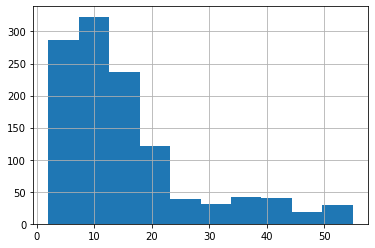

In [ ]:
# This function draw a histogram for the length of English tweets based on  the number of tokens per tweet

def tokenPerTweetHistogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

tokenPerTweetHistogram(df_en['tweet'])

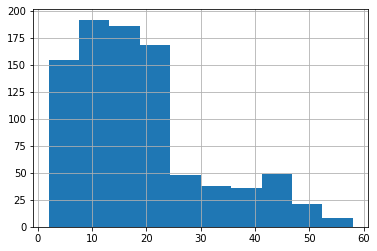

In [ ]:
# This function draw a histogram for the length of Arabic tweets based on  the number of tokens per tweet

def tokenPerTweetHistogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

tokenPerTweetHistogram(df_ar['tweet'])

**Step 6: Number of Characters per Token:**

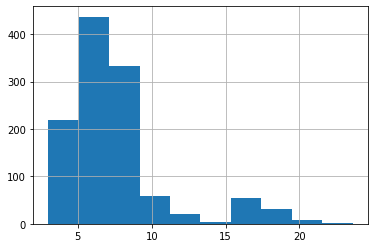

In [ ]:
# This function creates a histogram based on the number of characters per token

def characterPerTokenHistogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()
characterPerTokenHistogram(df_en['tweet'])

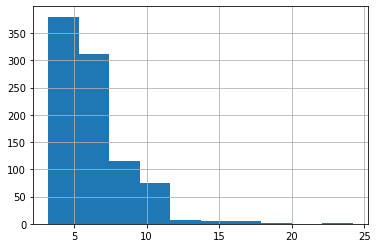

In [ ]:
# This function creates a histogram based on the number of characters per token

def characterPerTokenHistogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()
characterPerTokenHistogram(df_ar['tweet'])

**Step 7: Word Cloud Graph:**

Word cloud graph provides a visual representation of the text, which could be very helpful to highlight keywords and most important terms in the textual data.  

In [ ]:
# this function generate the word cloud for the Arabic dataset

!pip install wordcloud-fa==0.1.4
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from wordcloud_fa import WordCloudFa

wodcloud = WordCloudFa(persian_normalize=False)
# handcrafted terms/characters to further filter the text, selected based on a manual inspection of the data
#stop = ['@USER:','@USER','.', ':', '?', '؟','...', '..', '"','!!','']
# words that has "ال" as a main part from them
#no_prefix = ['الله', 'اللهم']
tokens_clean = []
for word in tokenFilteredCleaned_ar:
#  if (word not in stop):
    if word.startswith('ال'):
      #if (word not in no_prefix):
        word = word[2:] # to remove the prefix "ال"
    tokens_clean.append(word)

#printing the list of tokens
print(tokens_clean)

# generating the word cloud graph
# Need to get downloaded because it will appear in the online temp folder
data = str(tokens_clean)
wc = wodcloud.generate(data)
image = wc.to_image()
image.show()
image.save('wordcloud.png')
image.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['موقع', 'فيسبوك', 'يغلق', 'صفحة', 'رسمية', 'لمبادرة', ' فطرة ', '', 'وصولها', '', 'أكثر', '', '', '', 'متابع', 'https  t co IjNwwnxp', '', 'انتشار', 'فكرة', 'ووصول', 'صفحة', 'فطرة', '', 'فيسبوك', 'لأكثر', '', '', '', 'شخص', '', 'مستوى', 'عالم ', 'وكعادة', 'غرب', '', 'تقييد', 'حريات', '', '', 'ا ', ' فيسبوك ', 'يغلق', 'صفحة', 'رسمية', 'لمبادرة', '  فطرة ', '', 'وجدت', 'لمحاربة', 'شذو ذ ', 'وذلك', '', 'وصول', 'صفحة', '', '', 'متابع  ', 'فيسبوك', 'للأسف', 'أص ', '', 'كانوا', '', '', 'حرية', 'ممارسة', 'فعل ', 'فنحن', 'لدينا', 'مطلق', 'حرية', '', 'رفض', 'فعل', 'وعدم', 'إعتراف', ' ', ' الشذوذ انحراف مرفوض', ' انشر ف ', '', 'قدم ', '', 'أيام', 'سد وم ', '', 'أيام', 'اﻹسكندر', 'مقدوني ', '', '', 'يرتكب', 'لواط', ' ', '', '', 'تتغي ر', ' الفطرة ', ' ', 'فطرة', ' باقية', '', 'تتمدد ', ' ', '', ' باقية', 'وتتمدد ', ' ', '', '', 'حملة', '  فطرة فكرة ', '', '', ' قضيب', '', 'است ', ' ', '', '', 'ضلال

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(-0.5, 399.5, 199.5, -0.5)

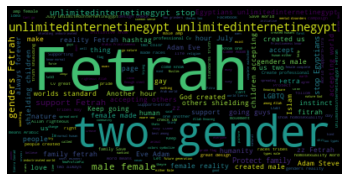

In [ ]:
# Creating word cloud for the English dataset

!pip install wordcloud
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


stringTokenEn = ' '.join([str(item) for item in tokenFilteredCleaned_en])
wordcloud = WordCloud().generate(stringTokenEn)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Overall the analysis demonstrate some differences among the two datasets. Arabic tweets show top tokens related to the closing of Fetrah Facebook page and also shows longer tweets average than the English one. While the English tweets report frequent tokens related to family and religion.

#Applying the Perspective API:


We will start by importing the libraries that are required during this step:


In [2]:
# importing libraries
import json
import requests
import csv
import pandas as pd
import numpy as np
import string
import re



Next, we need to provide our code of the Perspective API key to access the API. This code is  passed to the AnalyzeComment method to provide an API request and analyze the tweets based on the the requested attributes as we will discuss below. 


In [5]:
# assigning the access code to the API
api_key = '## Add your code here ##'
url = ('https://commentanalyzer.googleapis.com/v1alpha1/comments:analyze' +
    '?key=' + api_key)

The next step is uploading and reading the datasets if they are not available on the current Colab project repository.

In [2]:
# reading the English dataset
df_en = pd.read_csv('/content/Fetrah_EN_Filtered.csv', header= 0)
df_en

,tweet
0,Adam and Eve not Adam and steve #فطرة
1,There are only two genders. This is our real...
2,#Fetrah #فطرة We came from Adam and Eve not...
3,#Fetrah save our future generation #فطرة htt...
4,God created us as two genders ONLY. #فطرة #...
...,...
1163,There are only two genders ! #انشر_فِطرة #فطرة...
1164,#fetrah is an initiative through which you sho...
1165,There are only two genders #fetrah #فطرة #fetra
1166,There are only two genders #fetrah #فطرة https...


In [3]:
# reading the Arabic dataset
df_ar = pd.read_csv('/content/Fetrah_AR_Filtered.csv', header= 0)
df_ar

,tweet
0,موقع فيسبوك يغلق الصفحة الرسمية لمبادرة #فطر...
1,بعد انتشار الفكرة ووصول صفحة فطرة على فيسبوك...
2,"""فيسبوك"" يغلق الصفحة الرسمية لمبادرة ""#فطرة""..."
3,إذا كانوا هم لهم حرية ممارسة الفعل.. فنحن لد...
4,منذ القدم، من أيام سدّوم، من أيام اﻹسكندر المق...
...,...
897,قال تعالى:{فَأَقِمْ وَجْهَكَ لِلدِّينِ حَنِيفً...
898,هيّ وهو 🤍.#فطرة https://t.co/fS5t7rInyZ
899,حدد مكان عقلـ.ك الحملة لتوعية الناس مو لطلب ...
900,أنا مع #فطرة مبادرة مباركة 👍 https://t.co/7g...


The perspective API has multiple attributes. Currently, the main attribute is “TOXICITY” and the others are: “SEVERE_TOXICITY”, “IDENTITY_ATTACK”, “INSULT”, “PROFANITY, THREAT”, “SEXUALLY_EXPLICIT”, and “FLIRTATION”. However, not all attributes are available for all languages. For the Arabic language, only the main “TOXICITY” attribute is available. The values of all attributes are probabilities between 0 and 1. The higher the value, the more likely the text belongs to the attribute predicted. 

The AnalyzeComment method provides an API request to analyze the tweets based on the the requested attributes. In this case, we use the TOXICITY model as it is the only attribute that is supported by the Arabic language and English language on the same time. 

We define a dictionary that contains: tweet’s text, language, and an attributes for the requested attributes as the predicted toxicity probability score.

The quota limit is set to an average of 1 query per second (QPS) for all Perspective projects. Thus, we select the first 200 tweets and the last 200 tweets from both languages datasets to be used for testing the Perspective API so we can perform this experiment within a reasonable time frame using the regular Colab environment with a GPU accelerator. We also use the time Python library to pause for 60 seconds between the request calls to the API using the sleep() function.

In [7]:
# selecting the first 200 tweets from both Arabic and English datasets
df_short_en_f = df_en.iloc[:200]
df_short_ar_f = df_ar.iloc[:200]

# selecting the last 200 tweets from both Arabic and English datasets
df_short_en_l = df_en.iloc[-200:]
df_short_ar_l = df_ar.iloc[-200:]


In [ ]:

# sending the request to the Perspective API
# importing time library
import time
# Define a dictionary to store the predicted toxicity probabilities scores
comment_scores = {}
i = 0
# the name of the dataset/ dataframe should be replaced with "df_short_ar_l" to analyze the last 200 Arabic tweets
for c in df_short_ar_l['tweet']:
  i = i + 1
  data_dict = {
    'comment': {'text': c},
    'languages': ['ar'],
    'requestedAttributes': {'TOXICITY': {}}
  }
  response = requests.post(url=url, data=json.dumps(data_dict))
  response_dict = json.loads(response.content)
  print (response_dict)
  comment_scores[c] = response_dict['attributeScores']['TOXICITY']['summaryScore']['value']
  if (i % 10) == 0:
    time.sleep(60)

# tweets textual content is saved in the keys
keys = comment_scores.keys()

# the predicted toxicity probabilities scores are saved in values
values = comment_scores.values()

print(comment_scores)

{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 91, 'score': {'value': 0.4945446, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.4945446, 'type': 'PROBABILITY'}}}, 'languages': ['ar'], 'detectedLanguages': ['ar']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 38, 'score': {'value': 0.10031791, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.10031791, 'type': 'PROBABILITY'}}}, 'languages': ['ar'], 'detectedLanguages': ['ar', 'ug']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 13, 'score': {'value': 0.10956893, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.10956893, 'type': 'PROBABILITY'}}}, 'languages': ['ar'], 'detectedLanguages': ['ar']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 109, 'score': {'value': 0.05373499, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.05373499, 'type': 'PROBABILITY'}}}, 'languages': ['ar'], 'detectedLanguages': ['ar']}
{'attributeScores':


The same script above is used for both Arabic tweets dataframes by replacing the name of the dataframe. First applied to the “df_short_ar_f” and then applied to the “df_short_ar_l“. The predictions scores are then saved into a dataframe and a CSV file to support further analysis and testing. We also save the file to Google drive as the following: 


In [ ]:
# saving the predictions to a dataframe and then to a CSV file for further analysis
# replace the outputfile name with "Perspective_ar_last.csv" to save the predictions for the last 200 Arabic tweets

outputfile = "Perspective_ar_last.csv"
df_Predictions_ar_f = pd.DataFrame({'tweet': keys, 'Predicted':values})

with open(outputfile, mode='w', newline='\n', encoding="utf-8-sig") as f:
            df_Predictions_ar_f.to_csv(f, sep=',', float_format='%.2f',
                              index=False, quoting=csv.QUOTE_MINIMAL)


# saving the file to your Google drive
# replace the file name with "Perspective_ar_last.csv" to save the predictions for the last 200 Arabic tweets to the drive
# you will need to grant permission to Colab to access your Google drive
file_name = "Perspective_ar_last.csv"

from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build
from google.colab import auth

auth.authenticate_user()
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
  file_metadata = {'name': name, 'mimeType': 'application/octet-stream'}
  media = MediaFileUpload(path, mimetype='application/octet-stream', resumable=True)
  created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

  return created

save_file_to_drive(file_name, file_name)

{'id': '1awS29hA97SeD6jEjJfNF3V1sGw1ZKTP1'}

Then, we repeat the same script above to receive the predictions but for the English datasets; df_short_en_f and df_short_en_l as the following:

In [8]:
# sending the request to the Perspective API
# importing time library
import time

# Define a dictionary to store the predicted toxicity probabilities scores
comment_scores = {}
i = 0
# the name of the dataset/ dataframe should be replaced with "df_short_en_l" to analyze the last 200 English tweets
for c in df_short_en_l['tweet']:
  i = i + 1
  data_dict = {
    'comment': {'text': c},
    'languages': ['en'],
    'requestedAttributes': {'TOXICITY': {}}
  }
  response = requests.post(url=url, data=json.dumps(data_dict))
  response_dict = json.loads(response.content)
  print (response_dict)
  comment_scores[c] = response_dict['attributeScores']['TOXICITY']['summaryScore']['value']
  if (i % 10) == 0:
    time.sleep(60)

# tweets textual content is saved in the keys
keys = comment_scores.keys()
# the predicted probabilities scores are saved in values
values = comment_scores.values()

print(comment_scores)

{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 133, 'score': {'value': 0.13386416, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.13386416, 'type': 'PROBABILITY'}}}, 'languages': ['en'], 'detectedLanguages': ['ar']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 205, 'score': {'value': 0.19936113, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.19936113, 'type': 'PROBABILITY'}}}, 'languages': ['en'], 'detectedLanguages': ['en']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 69, 'score': {'value': 0.12631269, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.12631269, 'type': 'PROBABILITY'}}}, 'languages': ['en'], 'detectedLanguages': ['en', 'ar', 'om']}
{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 85, 'score': {'value': 0.24769363, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.24769363, 'type': 'PROBABILITY'}}}, 'languages': ['en'], 'detectedLanguages': ['en']}
{'attribut



We repeat the same steps above to create a dataframe and save the predictions results to a CSV file and upload it to Google drive as the following:


In [9]:
# saving the predictions to a dataframe and then to a CSV file for further analysis
# replace the outputfile name with "Perspective_en_last.csv" to save the predictions for the last 200 English tweets

outputfile = "Perspective_en_last.csv"
df_Predictions_en_f = pd.DataFrame({'tweet': keys, 'Predicted':values})

with open(outputfile, mode='w', newline='\n', encoding="utf-8-sig") as f:
            df_Predictions_en_f.to_csv(f, sep=',', float_format='%.2f',
                              index=False, quoting=csv.QUOTE_MINIMAL)


# saving the file to your Google drive
# replace the file name with "Perspective_en_last.csv" to save the predictions for the last 200 Arabic tweets to the drive
# you will need to grant permission to Colab to access your Google drive
file_name = "Perspective_en_last.csv"

from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build
from google.colab import auth

auth.authenticate_user()
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
  file_metadata = {'name': name, 'mimeType': 'application/octet-stream'}
  media = MediaFileUpload(path, mimetype='application/octet-stream', resumable=True)
  created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

  return created

save_file_to_drive(file_name, file_name)

{'id': '1hngv6hI2IfxUvSHJzsvdlbrcM-AkIwGR'}

#Evaluating Samples from the Results:

The datasets used in this exercise are not labelled. We do not have gold labels to check and evaluate the predictions toxicity scores and use the standard performance measures, such as recall, F-1, precision, or accuracy. Thus, we will be very limited in our evaluation and apply only two methods: manual inspection and general descriptive statistics. We encourage the readers to try other methods to better understand the issue and evaluate the accuracy of the outputs. 

In [10]:
df_ar_f = pd.read_csv('/content/Perspective_ar_first.csv', header= 0)
df_ar_f

,tweet,Predicted
0,موقع فيسبوك يغلق الصفحة الرسمية لمبادرة #فطر...,0.06
1,بعد انتشار الفكرة ووصول صفحة فطرة على فيسبوك...,0.14
2,"""فيسبوك"" يغلق الصفحة الرسمية لمبادرة ""#فطرة""...",0.22
3,إذا كانوا هم لهم حرية ممارسة الفعل.. فنحن لد...,0.16
4,منذ القدم، من أيام سدّوم، من أيام اﻹسكندر المق...,0.29
...,...,...
195,موقع فيسبوك يغلق الصفحة الرسمية لمبادرة #فطرة...,0.08
196,فَأَقِمْ وَجْهَكَ لِلدِّينِ حَنِيفًا ۚ فِطْرَت...,0.06
197,#فطرة هل لهم حساب مخصص في تويتر او تطبيقات أ...,0.06
198,الشواااZ والمنحرفــ؛ـين والفسويات، مصممين يعمل...,0.32


In [11]:
df_ar_l = pd.read_csv('/content/Perspective_ar_last (1).csv', header= 0)
df_ar_l

,tweet,Predicted
0,بيقولك مرة واحد مسلم بيدعم الخولات #فطرة #فطرة...,0.49
1,فففففففططططططططططرررررررةةةةةةةة #فطرة,0.10
2,#فطرة ستستمر,0.11
3,(وَأَنَّهُ خَلَقَ الزَّوْجَيْنِ الذَّكَرَ وَال...,0.05
4,إن كنت مريض حاول تتعالج ما تنشر المرض في النا...,0.26
...,...,...
195,قال تعالى:{فَأَقِمْ وَجْهَكَ لِلدِّينِ حَنِيفً...,0.06
196,هيّ وهو 🤍.#فطرة https://t.co/fS5t7rInyZ,0.14
197,حدد مكان عقلـ.ك الحملة لتوعية الناس مو لطلب ...,0.16
198,أنا مع #فطرة مبادرة مباركة 👍 https://t.co/7g...,0.04


In [5]:
df_en_l = pd.read_csv('/content/Perspective_en_last (1).csv', header= 0)
df_en_l

,tweet,Predicted
0,"There are only male and female , this is our r...",0.13
1,"Although we shouldn't be stating the obvious, ...",0.20
2,There are only two genders... #فطرة #Fetrah ...,0.13
3,No for gays There are only two gender #no_gay...,0.25
4,Humans are only two sexes #Fetrah #فطرة htt...,0.12
...,...,...
195,There are only two genders ! #انشر_فِطرة #فطرة...,0.12
196,#fetrah is an initiative through which you sho...,0.23
197,There are only two genders #fetrah #فطرة #fetra,0.12
198,There are only two genders #fetrah #فطرة https...,0.12


In [3]:
df_en_f = pd.read_csv('/content/Perspective_en_first.csv', header= 0)
df_en_f

,tweet,Predicted
0,Adam and Eve not Adam and steve #فطرة,0.10
1,There are only two genders. This is our real...,0.12
2,#Fetrah #فطرة We came from Adam and Eve not...,0.06
3,#Fetrah save our future generation #فطرة htt...,0.05
4,God created us as two genders ONLY. #فطرة #...,0.12
...,...,...
195,I heard they made a new pride flag for queer c...,0.23
196,"Boy and gerl kissing, just like it should be i...",0.17
197,These colors look lovely don't they? Women sh...,0.15
198,"𝕀𝕥'𝕤 𝔼𝕚𝕕 𝕒𝕝 𝔸𝕕𝕙𝕒, 𝕃𝕖𝕥'𝕤 ℝ𝕖𝕧𝕚𝕧𝕖 𝕥𝕙𝕖 𝕊𝕦𝕟𝕟𝕒𝕙! ....",0.13




A general descriptive statistical information could help to assess the overall outcome of the predictions. The following figures pinpoint if there are any variations among the datasets.


In [14]:
# The first 200 Arabic tweets
df_ar_f_stat = df_ar_f.describe()
df_ar_f_stat

,Predicted
count,200.000000
mean,0.151850
std,0.094943
min,0.020000
25%,0.077500
50%,0.120000
75%,0.210000
max,0.390000


In [15]:
# The last 200 Arabic tweets
df_ar_l_stat = df_ar_l.describe()
df_ar_l_stat

,Predicted
count,200.000000
mean,0.126300
std,0.114932
min,0.010000
25%,0.040000
50%,0.080000
75%,0.160000
max,0.490000


In [16]:
# The first 200 English tweets
df_en_f_stat = df_en_f.describe()
df_en_f_stat

,Predicted
count,200.000000
mean,0.138300
std,0.114668
min,0.010000
25%,0.070000
50%,0.110000
75%,0.150000
max,0.740000


In [17]:
# The last 200 English tweets
df_en_l_stat = df_en_l.describe()
df_en_l_stat

,Predicted
count,200.000000
mean,0.133100
std,0.133203
min,0.000000
25%,0.060000
50%,0.100000
75%,0.140000
max,0.890000


In [18]:
# Merging the Arabic datasets
ar_data = [df_ar_f, df_ar_l]
dataset_ar = pd.concat(ar_data)
dataset_ar

,tweet,Predicted
0,موقع فيسبوك يغلق الصفحة الرسمية لمبادرة #فطر...,0.06
1,بعد انتشار الفكرة ووصول صفحة فطرة على فيسبوك...,0.14
2,"""فيسبوك"" يغلق الصفحة الرسمية لمبادرة ""#فطرة""...",0.22
3,إذا كانوا هم لهم حرية ممارسة الفعل.. فنحن لد...,0.16
4,منذ القدم، من أيام سدّوم، من أيام اﻹسكندر المق...,0.29
...,...,...
195,قال تعالى:{فَأَقِمْ وَجْهَكَ لِلدِّينِ حَنِيفً...,0.06
196,هيّ وهو 🤍.#فطرة https://t.co/fS5t7rInyZ,0.14
197,حدد مكان عقلـ.ك الحملة لتوعية الناس مو لطلب ...,0.16
198,أنا مع #فطرة مبادرة مباركة 👍 https://t.co/7g...,0.04


In [6]:
# Merging the English datasets
en_data = [df_en_f, df_en_l]
dataset_en = pd.concat(en_data)
dataset_en

,tweet,Predicted
0,Adam and Eve not Adam and steve #فطرة,0.10
1,There are only two genders. This is our real...,0.12
2,#Fetrah #فطرة We came from Adam and Eve not...,0.06
3,#Fetrah save our future generation #فطرة htt...,0.05
4,God created us as two genders ONLY. #فطرة #...,0.12
...,...,...
195,There are only two genders ! #انشر_فِطرة #فطرة...,0.12
196,#fetrah is an initiative through which you sho...,0.23
197,There are only two genders #fetrah #فطرة #fetra,0.12
198,There are only two genders #fetrah #فطرة https...,0.12


In [20]:
# the mean of the overall Arabic dataset
mean_avg = dataset_ar.mean()
float(mean_avg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0.13907500000000003

In [21]:
# printing an ordered datasets
dataset_ar = dataset_ar.sort_values("Predicted")
dataset_ar

,tweet,Predicted
150,لا تحرموني من دعمكم لي #Fetrah #Girls https://...,0.01
61,#مجتمع_الميم #فطرة كل عام ونحن بخير وسلامة 🏳️...,0.02
147,#فطرة من أجمل المبادرات ❤️❤️ https://t.co/av6H...,0.02
130,توزيعات صلاة العيد 😍 #فطرة https://t.co/aeEy...,0.02
75,#فطرة #fetrah كل الدعم❤️ https://t.co/5NjXf...,0.02
...,...,...
96,بالعكس فطرة هي الحب و الحب هو #فطرة اما الشذ...,0.44
174,محروقيين ان مش كل الناس شا*اذ و منحر*ات زيك...,0.45
23,أغيثونا من أمراضكم وهوسكم الجنسي القذر ، وان...,0.45
24,أغيثونا من أمراضكم وهوسكم الجنسي القذر ، وانتك...,0.45


In [8]:
# printing an ordered datasets
dataset_en = dataset_en.sort_values("Predicted")
dataset_en

,tweet,Predicted
73,Share♥️ #Fetrah https://t.co/Bm6tc3aqL4,0.00
39,Support the fetrah campaign #fetrah https://t....,0.01
123,Support #Fetrah,0.01
73,Supportive #Fetrah,0.01
144,"Yessir ! "" Btw support #Fetrah &lt;3.""",0.01
...,...,...
154,"I vote against #LGTB the scum of people, I v...",0.68
120,How disgusting you're.. You will keep being...,0.70
128,Whoever likes the idea even a bit of this stup...,0.74
28,In childhood we were in love with rainbow aft...,0.87


In [9]:
# counting frequencies of toxicity scores
dataset_en.Predicted.value_counts()

0.12    42
0.09    36
0.10    33
0.11    27
0.05    24
0.13    23
0.06    22
0.04    19
0.07    16
0.08    15
0.01    13
0.15    13
0.03    12
0.23    10
0.16    10
0.02     9
0.14     7
0.17     7
0.32     6
0.29     5
0.42     4
0.39     4
0.36     3
0.25     3
0.27     3
0.38     2
0.68     2
0.31     2
0.34     2
0.24     2
0.20     2
0.28     2
0.22     2
0.21     2
0.19     2
0.74     1
0.53     1
0.70     1
0.87     1
0.58     1
0.55     1
0.00     1
0.49     1
0.44     1
0.43     1
0.40     1
0.30     1
0.18     1
0.89     1
Name: Predicted, dtype: int64

In [24]:
# print the tweet with the highest toxicity score
last = dataset_en.iloc[-1:]
last.tweet

184    Literally F*** your fetrah, all of you are hat...
Name: tweet, dtype: object

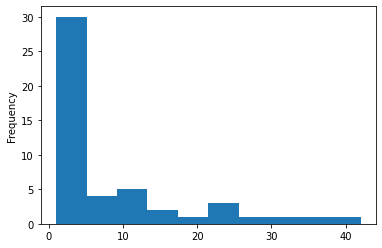

In [10]:
# printing a histogram for the results based on the frequencies
dataset_en['Predicted'].value_counts().plot(kind='hist')

In [26]:
# counting frequencies of toxicity scores
dataset_ar.Predicted.value_counts()

0.03    48
0.07    29
0.10    23
0.06    23
0.09    22
0.04    21
0.16    20
0.05    18
0.08    18
0.11    14
0.15    13
0.29    11
0.14    10
0.21    10
0.13     9
0.27     9
0.12     8
0.36     8
0.34     8
0.19     7
0.20     7
0.02     5
0.17     5
0.24     5
0.18     5
0.32     5
0.31     5
0.22     4
0.30     4
0.26     4
0.23     4
0.45     3
0.39     3
0.43     2
0.28     2
0.35     2
0.44     2
0.01     1
0.42     1
0.37     1
0.49     1
Name: Predicted, dtype: int64

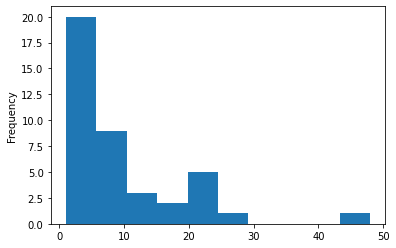

In [27]:
# printing a histogram for the results based on the frequencies
dataset_ar['Predicted'].value_counts().plot(kind='hist')

In [28]:
# print the tweet with the highest toxicity score
last = dataset_ar.iloc[-1:]
last.tweet

0    بيقولك مرة واحد مسلم بيدعم الخولات #فطرة #فطرة...
Name: tweet, dtype: object